# <center> Module 2

Group: 12<br>
Darko Petrov<br>
Alexander Lendon

### <center> Q1.


#### 1.
The equality constraint was defined as 
$$
y_t(\theta^Tx_t+\mu)<0
$$
so we would like to minimise this term to find the optimal solution.
$$
\min_{(\theta,\mu),(z_i\in \Reals)} \sum^n_{t=1}l(z_t)+\frac{\alpha}{2}||\theta||^2_2\\
s.t.\\
z_t= y_t(\theta^Tx_t+ \mu)
$$
To obtain the lagarangian function one must introduce lagrange multipliers to the equality constraints. 
Bringing in the equality constraint and multiplying by the lagrange multiplier $\lambda_t$ associated with the ith equality constraint.
$$
L(\theta,\mu,\{z_i\in \Reals\},\lambda) = \sum^n_{t=1}l(z_t)+\frac{\alpha}{2}||\theta||^2_2 + \sum^n_{t=1}\lambda_t(z_t - y_t(\theta^Tx_t+ \mu))
$$

In satisfying slaters condition, a point where conditions that satisfy strong duality must exist. At this point the solutions to the primal and dual problems are equal. A point where these conditions are met (all inequality constrains are satisfied) is in the interior of the feasible set.
Therefore if we introduce this point for $\lambda \geq 0$:
$$
g(\lambda)\leq p^*
$$
For some feasible point $\bar{z}$ the lagragian dual function therfore satisfies
$$
g(\lambda) =\sum^n_{t=1}\lambda_t(\bar{z}-\bar{y}(\theta^T\bar{x}+\mu)) \leq 0
$$

and so the following condition is satisfied.
$$
l(\bar{z})+\frac{\alpha}{2}||\theta||^2_2 + \sum^n_{t=1}\lambda_t(\bar{z} - y_t(\theta^Tx_t+ \mu)) 
\leq 
l(\bar{z})+\frac{\alpha}{2}||\theta||^2_2
$$
Or the original minimisation for the primal solution is always larger than the dual solution.

$$
\min_{(\theta, \mu)}\sum^n_{i=1}\ell(y_i(\theta^Tx_i+\mu))+\frac{\alpha}{2}||{\theta}||^2_2
$$

$$
\ell(z) = log(1+e^z)
$$

$$
\ell(z) = \{0    z<0 \\ z z\geq 0 \}
$$

$$
\min_{(\theta, \mu),\{z\in \real\}} \sum^n_{i=1} \ell(z_i) + \frac{\alpha}{2}||\theta||^2_2
$$

#### 2.


#### 3.

#### 4.

a)

n=100, d=2 alpha=0.1, reg=0.1,
n=100, d=2 alpha=0.1, reg=0.6444444444444445,
n=100, d=2 alpha=0.1, reg=1.188888888888889,
n=100, d=2 alpha=0.1, reg=1.7333333333333336,
n=100, d=2 alpha=0.1, reg=2.277777777777778,
n=100, d=2 alpha=0.1, reg=2.8222222222222224,
n=100, d=2 alpha=0.1, reg=3.366666666666667,
n=100, d=2 alpha=0.1, reg=3.911111111111112,
n=100, d=2 alpha=0.1, reg=4.455555555555556,
n=100, d=2 alpha=0.1, reg=5.0,
n=100, d=2 alpha=2, reg=0.1,
n=100, d=2 alpha=2, reg=0.6444444444444445,
n=100, d=2 alpha=2, reg=1.188888888888889,
n=100, d=2 alpha=2, reg=1.7333333333333336,
n=100, d=2 alpha=2, reg=2.277777777777778,
n=100, d=2 alpha=2, reg=2.8222222222222224,
n=100, d=2 alpha=2, reg=3.366666666666667,
n=100, d=2 alpha=2, reg=3.911111111111112,
n=100, d=2 alpha=2, reg=4.455555555555556,
n=100, d=2 alpha=2, reg=5.0,
n=100, d=2 alpha=5, reg=0.1,
n=100, d=2 alpha=5, reg=0.6444444444444445,
n=100, d=2 alpha=5, reg=1.188888888888889,
n=100, d=2 alpha=5, reg=1.7333333333333336,
n=100, d=2

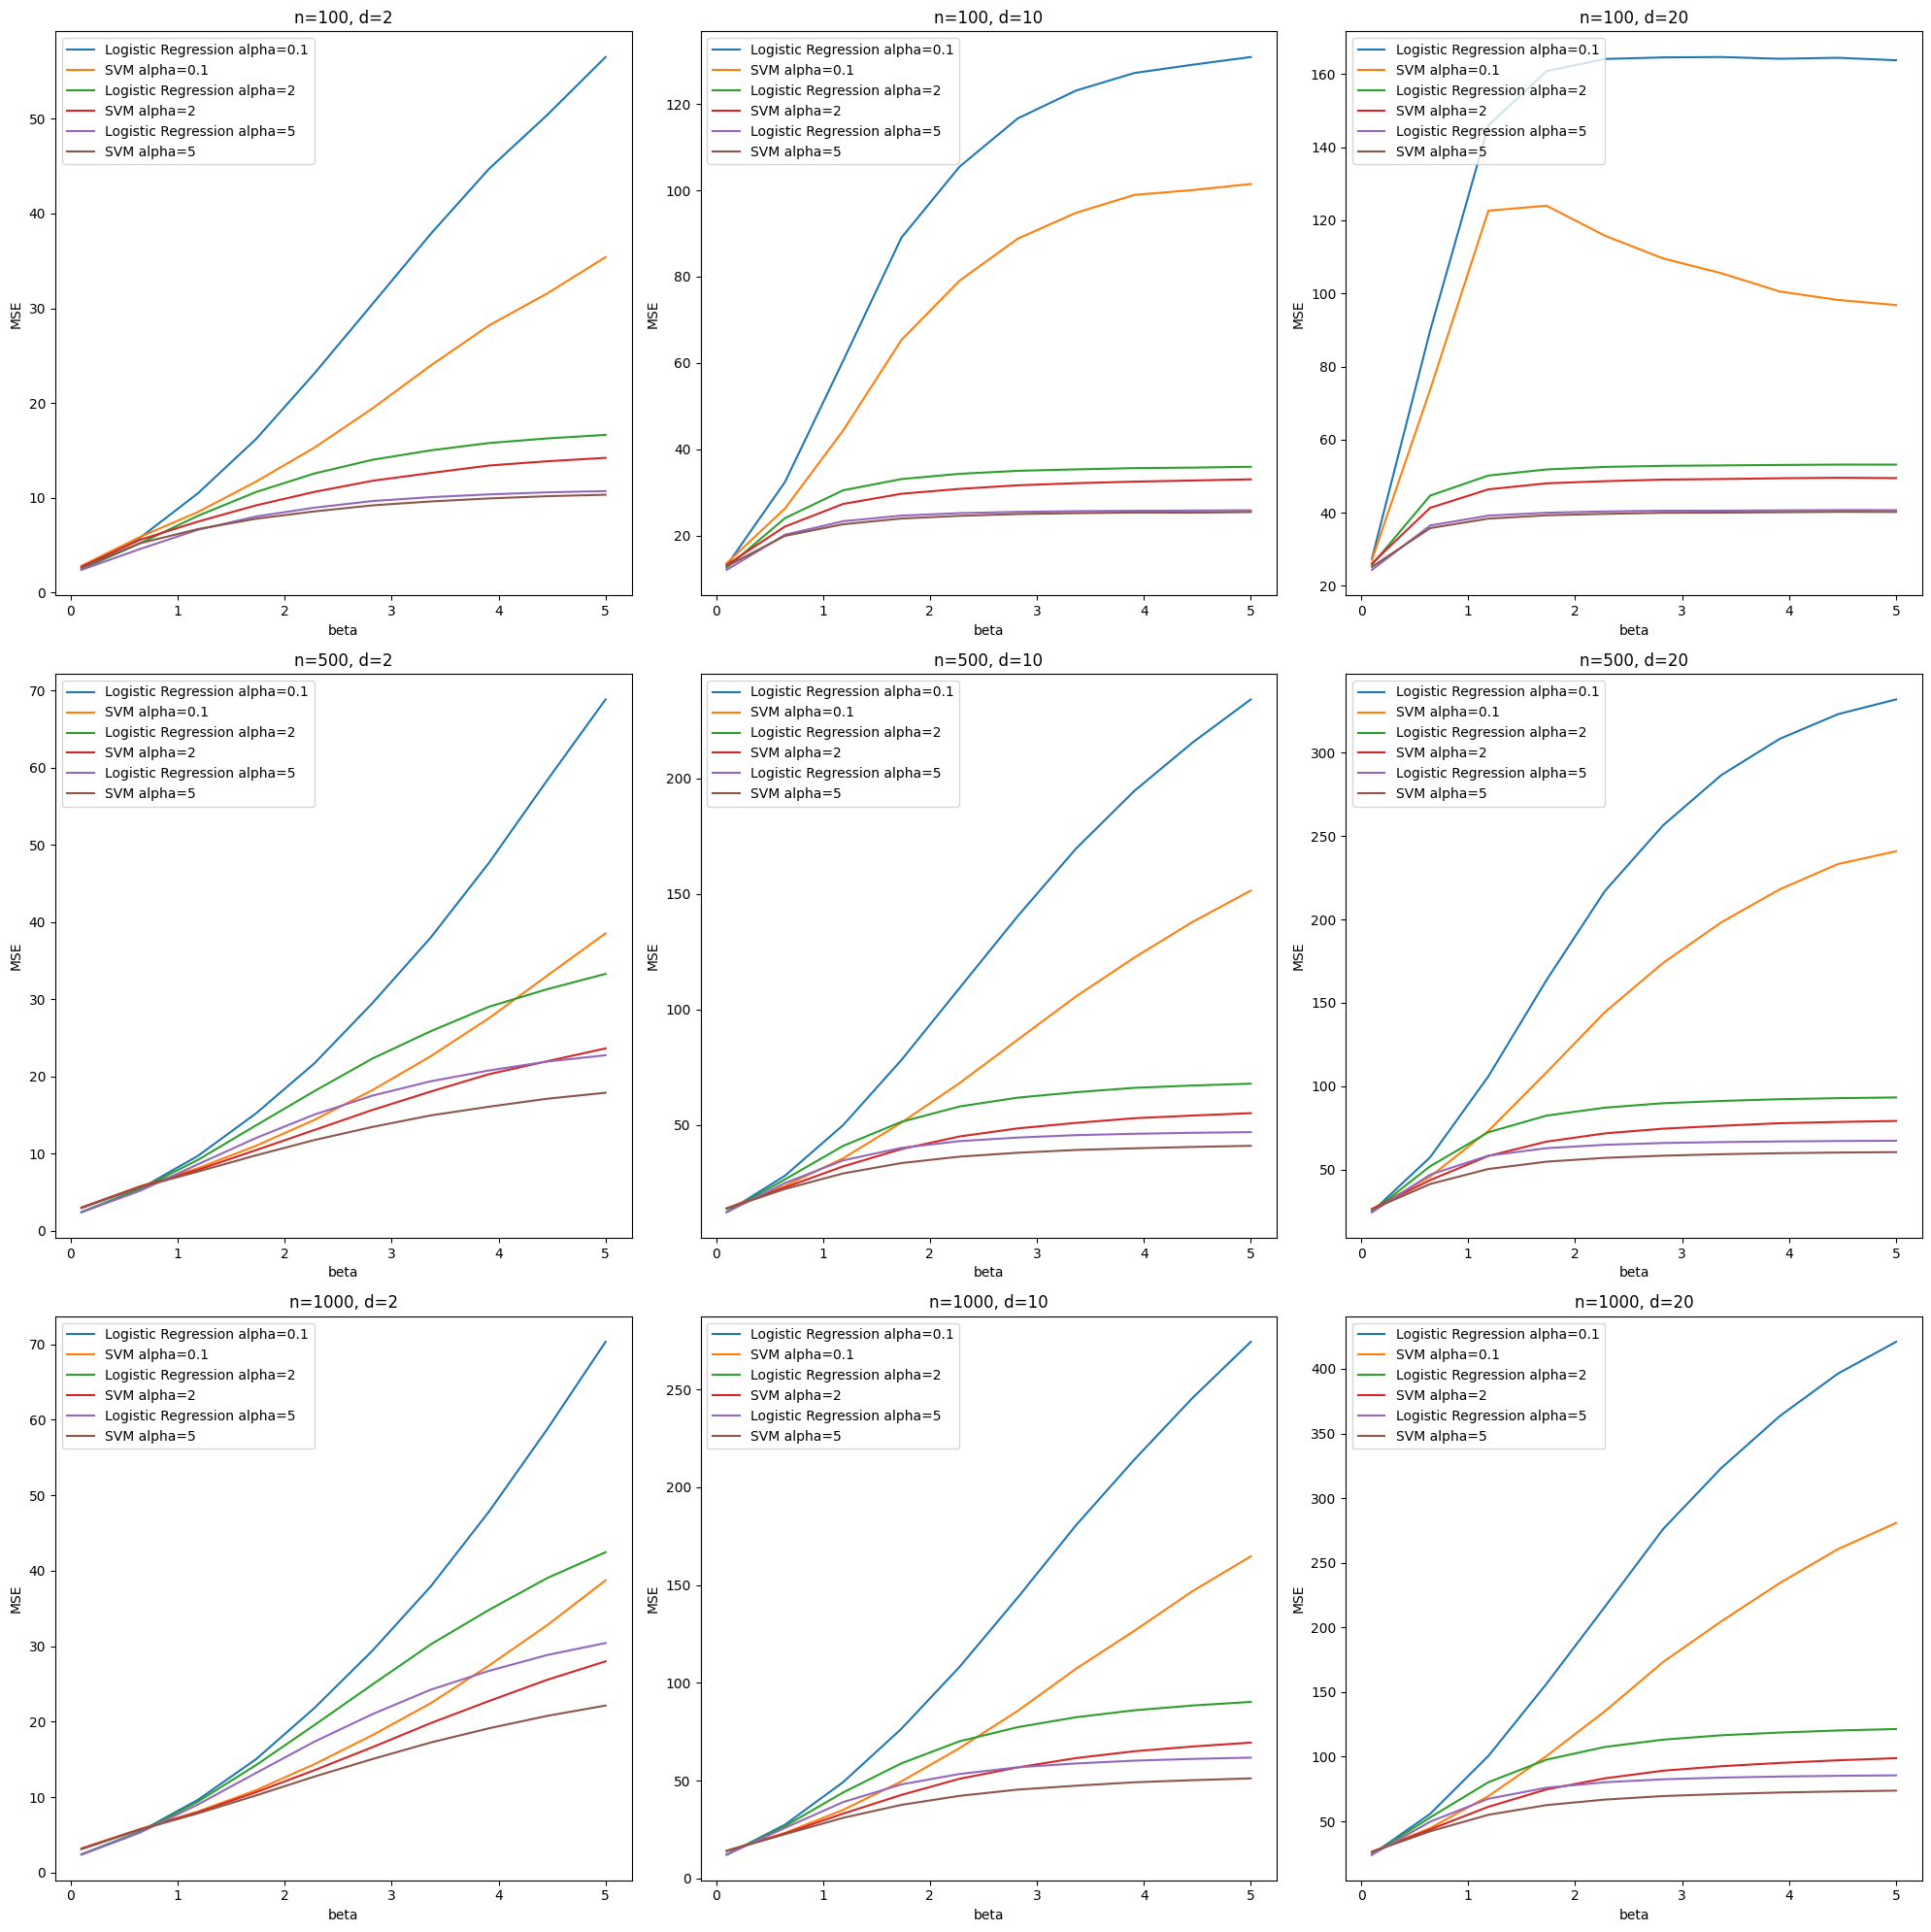

In [1]:
import numpy as np
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def get_Y(beta, theta0, X):
    Y = []
    for x_i in X:
        t_i = np.matmul(theta0.T, x_i)
        odds = np.exp(beta*t_i)
        Y.append(np.random.choice(a=[-1, 1], size=1, p= [odds/(1+odds), 1/(1+odds)])[0])
    return Y

def error_calc(alpha,n,d,beta):
    theta0=np.ones(d)
    # Write a code that generates a synthetic dataset X,Y
    # X has n rows (number of data points) and d columns (number of features)
    # and Y is a 1-d array with n elements each being -1 or 1
    # each element of X is standard Gaussian
    # for the i element of Y is randomly generated by the
    # description in the pdf file and parameter alpha
    X = np.random.normal(0, 1, size=(n, d))    
    Y = get_Y(beta, theta0, X)
    Y = np.array(Y)
    # print(Y)
    # run svm.SVC with parameters (C=1/alpha,kernel='linear')
    # also run Logisticregression with parameter (C=1/alpha)
    # See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    # See: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    if len(np.unique(Y)) == 2:    
        model_LR = LogisticRegression(C=1/alpha)
        model_LR.fit(X=X, y=Y)
        model_SVC = svm.SVC(C=1/alpha, kernel='linear')
        model_SVC.fit(X=X, y=Y)
    else:
        print('Y has only one class this iteration is ignored')
        # sameY += 1
        return None, None

    # read out the coefficients of the trained models
    coef_LR = model_LR.coef_
    coef_SVM = model_SVC.coef_

    # calculate SQUARE L2 norm of the error between the coefficients of each model
    # and theta0, call the error_LR and error_SVM
    error_LR = np.linalg.norm(coef_LR - theta0) ** 2
    error_SVM = np.linalg.norm(coef_SVM - theta0) ** 2

    return error_LR, error_SVM

def avg_risk_calc(reg,n,d,alpha):
    # write a for loop that calculates the error for 1000 times
    # Although the parametrs reg, n,d,alpha are the same, each error is random
    # because the dataset is generated again
    # Calculate the average errors of 1000 runs 
    # You get MSE_LR and MSE_SVM
    errors_LR = []
    errors_SVC = []
    for _ in range(1000):
        error_LR, error_SVC = error_calc(alpha, n, d, reg)
        if error_LR is None or error_SVC is None:
            continue
        errors_LR.append(error_LR)
        errors_SVC.append(error_SVC)
    MSE_LR = np.mean(errors_LR)
    MSE_SVC = np.mean(errors_SVC)
    return MSE_LR, MSE_SVC

# Now using avg_risk_calc function plot the risk function of alpha
# for different values n,d, reg 
n_values = [100, 500, 1000]
d_values = [2, 10, 20]
alpha_values = [0.1, 2, 5]

fig, axs = plt.subplots(len(n_values), len(d_values), figsize=(20, 20))

for i, n in enumerate(n_values):
    for j, d in enumerate(d_values):
        for alpha in alpha_values:
            MSE_LR_values = []
            MSE_SVM_values = []
            reg_values = np.linspace(0.1, 5, num=10)
            for reg in reg_values:
                print(f'n={n}, d={d} alpha={alpha}, reg={reg},')
                MSE_LR, MSE_SVM = avg_risk_calc(reg, n, d, alpha)
                MSE_LR_values.append(MSE_LR)
                MSE_SVM_values.append(MSE_SVM)
            axs[i, j].plot(reg_values, MSE_LR_values, label=f'Logistic Regression alpha={alpha}')
            axs[i, j].plot(reg_values, MSE_SVM_values, label=f'SVC alpha={alpha}')
            axs[i, j].set_xlabel('beta')
            axs[i, j].set_ylabel('MSE')
            axs[i, j].set_title(f'n={n}, d={d}')
            axs[i, j].legend()
# print(sameY)
plt.tight_layout()
plt.show()
fig.savefig('Code_2.png')

b) 
 
Observing the graphs it can be seen that $n$ increases the risk by a logarithmic decent for higher $n$ values this plotted over $\beta$ shapes the curve more exponential growth with higher value of $n$. This is due $n$ dictates the number of elements created and the because $\theta_0$ is ones the more -1 elements generated because the size of $n$ the higher the risk will get. 

$d$ has the countering effect of the shape of the curve where with higher values of $d$ the function has the shape of logarithmic growth function. With the increase of $d$ the plot also scales making the risk value consistently bigger with higher values. This is due the value of $d$ specifies the many dimensions will the model have to look at, and the more dimensions are the more likely is the models coefficients will converge faster, but this also increases the risk as each coefficient is impacting the risk and to active optimal state all coefficients must be 1. That is why we can see linear scaling of the risk with the increase of $d$

$\alpha$ gives the regularization strength and lower value of $\alpha$ will encourage the model to update the coefitians by more and the opposite is true for higher values. Form the plots above we can observe that with higher values of $\alpha$ the models give lower risk value. This can be due the models coefficients start very low and with higher values of $\alpha$ the coefficients do not change by a lot, and they stay closer to 1 as it is the optimal value until they reach convergence. 

c) 

For all the different values of the parameters SVC model gives consistently lower risk values. This is due the SVC model is more complex and can fit the data better. The SVC model is also more prone to overfitting and this can be seen in the plots above where the risk value for SVC model is lower than the risk value for the logistic regression model. 

### <center> Q2. (Expectation Maximization Clustering)

#### 1.

For $F(\theta,\theta^{(t)})$ to be a majorizer of $L(\theta)$ at $\theta^{(t)}$ we need 
$$
F(\theta^{(t)},\theta^{(t)}) = L(\theta^{(t)})
$$
and
$$
L(\theta) \leq F(\theta, \theta^{(t)})\text{ for all } \theta
$$  
to be true. 


For the first statment when we apply 
$$
F(\theta^{(t)},\theta^{(t)}) = \sum^n_{i=1} \sum^K_{k=1} \frac{\omega_{i,k}}{2\sigma^2} (\| x_i - \mu_k^{(t)} \|^2_2 - \| x_i - \mu_k^{(t)} \|^2_2) + L(\theta^{(t)})
$$

and sense the the norms cancel eachother when $\theta = \theta^{(t)}$ we are left with
$$
F(\theta^{(t)},\theta^{(t)}) =  L(\theta^{(t)})
$$

Proving the first condition.  






For the second statment we take the equation 

$$
L(\theta) = \sum^n_{i=1} \log (\sum^K_{k=1} e^{ -\frac{\| x_i - \mu_k \|^2_2 }{2\sigma^2}})
$$

and we can apply $\zeta_{i,k}$ and $w_{i,k}$ to get

$$
L(\theta) = \sum^n_{i=1} \log (\sum^K_{k=1}\zeta_{i,k} w_{i,k})
$$

Now we can apply Jensen's inequality and we get

$$
-\log (\sum^K_{k=1}\zeta_{i,k} w_{i,k}) \leq -\sum^K_{k=1}w_{i,k}log(\zeta_{i,k}) 
$$


#### 2.


To find the optimal solution we take the derivative of $F(\theta, \theta^{(t)})$ with respect to $\mu_k$

$$\frac{\partial F(\theta, \theta^{(t)})}{\partial \mu_k} = \sum_{i=1}^{n} \omega_{i,k} (x_i - \mu_k)$$

Setting this equal to zero gives us:

$$\sum_{i=1}^{n} \omega_{i,k} (x_i - \mu_k) = 0$$

and solving for $\mu_k^{t+1}$

$$\mu_k^{t+1} = \frac{\sum^n_{i=1}\omega_{i,k}x_i}{\sum^n_{i=1}\omega_{i,k}}$$



#### 3.

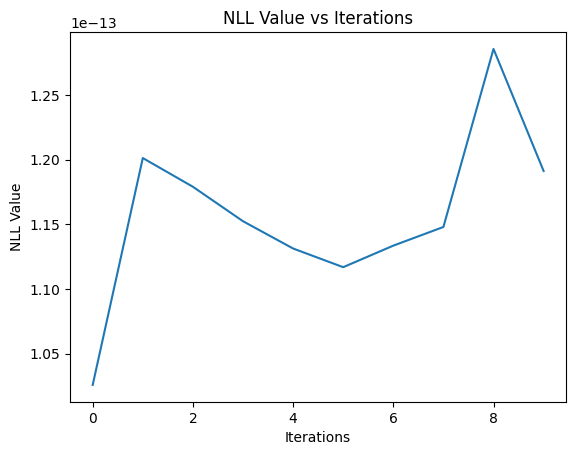

  0%|          | 0/47 [00:00<?, ?it/s]

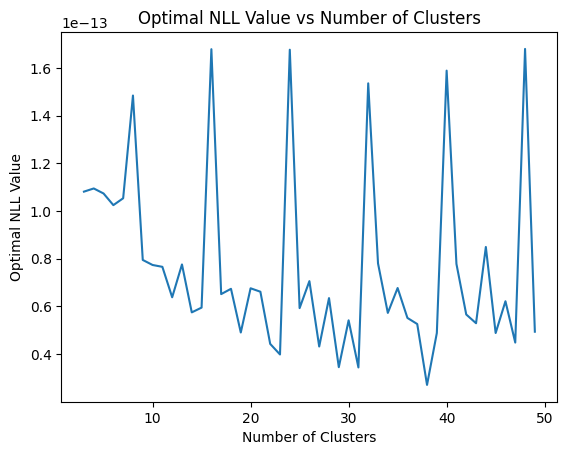

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\darko\AppData\Local\Temp\ipykernel_47952\2052188310.py:22: RuntimeWarning: invalid value encountered in divide
  omega[i] /= np.sum(omega[i])


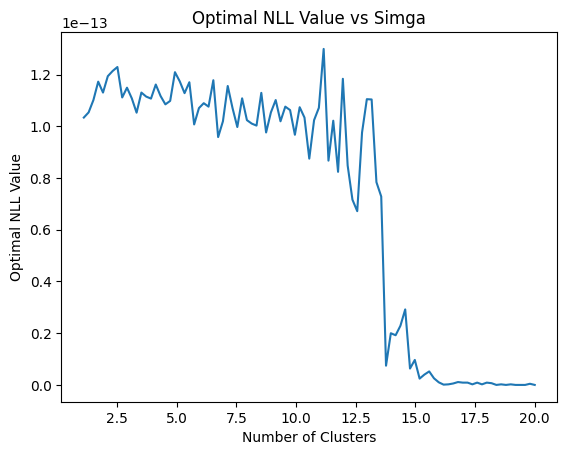

<Figure size 640x480 with 0 Axes>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

def EM_clustering(X,sigma,K):
    # Number of iterations
    iter_num=10
    # d is the number of features and n is the number of the data points:
    (n,d)=X.shape
    # Initialize the K centroids randomly. Each row is a centroid.
    M=np.random.randn(K,d)
    # A vector that stores the NLL value in different iterations:
    value=np.zeros(iter_num)
    #start the EM loop:
    for k in range(iter_num):
        # Apply the E stape by calculating the omega_{i,k} coefficients
        omega = np.zeros((n, K))
        for i in range(n):
            for j in range(K):
                omega[i, j] = np.exp(-(np.linalg.norm(X[i] - M[j])**2) / (2 * sigma**2))
            omega[i] /= np.sum(omega[i])
        # Apply the M step and obtain an update of M
        for j in range(K):
            m2 = np.sum(omega[:, j])
            # print(m2)
            m1 = np.sum(omega[:, j].reshape(-1, 1) * X, axis=0)
            M[j] =  m1 / m2
        # Calculate the NLL vale
        value[k] = -np.sum(np.log(np.sum(omega, axis=1)))

    return M, value

#Load the CC General dataset by pandas and keep the numerical part as a
# numpy array X
df = pd.read_csv('CC GENERAL.csv')
X = df.select_dtypes(include=np.number).fillna(0).values

# plt.plot(X)
plt.show()
# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# plt.plot(X)
plt.show()
# X= X-100000
# Apply EM_clustering(X,sigma,K)
sigma = 3
K = 3
M, value = EM_clustering(X, sigma, K)

# Plot value vs iterations
plt.plot(value)
plt.xlabel('Iterations')
plt.ylabel('NLL Value')
plt.title('NLL Value vs Iterations')
plt.savefig('Code_2_2_iter.png')
plt.show()

# Apply different numbers of clusters and plot the last
# value of NLL (i.e. value[-1]) as the optimal NLL vs the number of clusters
K_values = range(3, 50)
optimal_NLL_values = []
for K in tqdm.tqdm(K_values):
    M, value = EM_clustering(X, sigma, K)
    optimal_NLL_values.append(value[-1])
plt.plot(K_values, optimal_NLL_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Optimal NLL Value')
plt.title('Optimal NLL Value vs Number of Clusters')
plt.savefig('Code_2_2_K.png')
plt.show()


K = 3
sigma_values = np.linspace(0.1, 20, 100)
optimal_NLL_values = []
for sigma in tqdm.tqdm(sigma_values):
    M, value = EM_clustering(X, sigma, K)
    optimal_NLL_values.append(value[-1])
plt.plot(sigma_values, optimal_NLL_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Optimal NLL Value')
plt.title('Optimal NLL Value vs Simga')
plt.savefig('Code_2_2_sigma.png')
plt.show()


a)

When plotted the number of clusters we get a wave like pattern that follows as the highest optimal value when clusters and dividable by the number of features. This can be as each combination of the dimensions has one cluster and when the number of clusters is equal to the number of features the model is able to fit the data perfectly and divide the clusters more accurately. After the first cluster division the pattern repeats until it reaches the number of features again. 

b) 

When plotting different $\sigma$ for K=3 we get a pattern with a high optimal value where the difference increases as $\sigma$ increases. When it reaches $2*\sigma^2$ to be 10 times the max value in X the optimal value drops significantly, and it keeps approaching 0 as sigma increases. 

c)

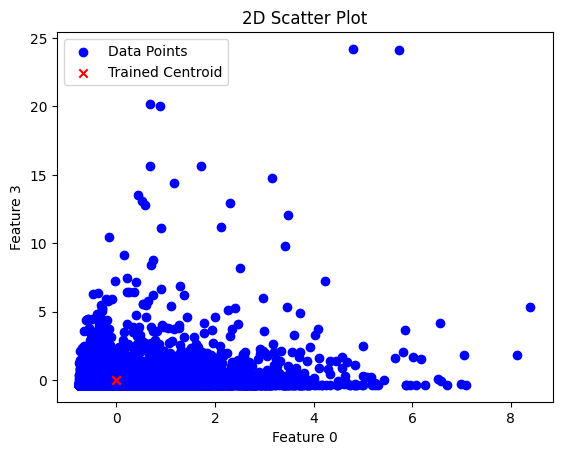

In [62]:
import matplotlib.pyplot as plt

feature1 = 0  
feature2 = 3  
# Plot the scatter plot
plt.scatter(X[:, feature1], X[:, feature2], c='blue', label='Data Points')
plt.scatter(M[:, feature1], M[:, feature2], c='red', marker='x', label='Trained Centroid')
plt.xlabel(f'Feature {feature1}')
plt.ylabel(f'Feature {feature2}')
plt.title('2D Scatter Plot')
plt.legend()
plt.show()


### <center> Q3. (Bregman divergence)

#### 1.

#### 2.

#### 3.